# Hito 2: Clasificación

ID-1

Octubre 2022

# Declaración de compromiso ético


Nosotros **Kianush Atighi-Moghaddam, Arturo Avendaño, Alonso Rojas, Diego Vera**, declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento. También, declaramos conocer y aceptar las reglas de este tipo de actividad, que han sido explicadas y aclaradas por el cuerpo académico de la asignatura.

# Introducción: Plantear el problema y la motivación.

### Cambio de enfoque.

Tomando en cuenta el feedback del profesor decidimos abandonar la idea de predecir algún tipo de indicador de pobreza con los datos del censo, en vez de eso tomamos una alternativa más realista que es responder preguntas relacionadas con la materialidad de las manzanas y la categorización de clases indeterminadas a base de atributos de materialidad, agua y otros sobre los que realizaremos pruebas para determinar cuáles son los más apropiados para realizar predicciones y responder a nuestras interrogantes.
### Propósito de nuestro analisis.

El propósito de este desarrollo espera resolver la incertidumbre que se genera cada vez que se levantan los datos del CENSO, ya que, a veces, no es posible acceder a revisar el tipo de terreno o tipo de entidad, siendo estas estimadas o simplemente indeterminadas, ya sea por cansancio de los censistas o falta de permisos o disposición de los residentes. De esta manera, los datos para futuros estudios quedan inconclusos y/o con vacíos en la información, generando trabajo extra para los analistas de datos que deseen trabajar con esa información para realizar otros tipos de estudios.

Para solucionar este problema es que se plantea la posibilidad de obtener la clase de la manzana, dígase el tipo de entidad (campo, pueblo, caserío, etc.) que esta representa para poder completar los datos para futuros análisis.

A base de los datos obtenidos por el censo, entre los cuales se encuentra el acceso a agua potable y la materialidad de las casas dentro de la manzana, podría ser posible obtener tal información.

### Mejoras del Hito 1

Del análisis y retroalimentación explorada se reformularon tanto las preguntas y problemáticas planteadas en la instancia inicial, siendo una de las mayores diferencias el cambio de las preguntas que se basaban solo de respuestas de tipo si/no. Adicionalmente, se realizó el cambio a las columnas que tratan con el tipo de material con el que se encuentran construidos los hogares censados, compactándolos al concepto de sí los materiales con los que se encuentran construidos son aceptables, pobres o excelentes. Además de los cambios principales, se identificaron problemas técnicos con la detección de valores NA las cuales fueron modificadas y solucionadas, se eliminaron los análisis descriptivos que no agregan ningún tipo análisis o información satisfactoria, mejoras en cuanto a la redacción y ortografía empleada, revisiones de los argumentos empleados al momento de realizar cada respuesta y una mejora en cuanto a la ejecución del código que ha sido empleado.

# Exploración de los datos

Dentro de esta fase se realizará una exploración de los datos ya avanzados del hito 1, los cuales ya se encuentran en un estado donde se realizó la limpieza, junto con un cambio de nombre de las variables para una mejora en la comprensión humana, además de las mejoras ya mencionadas con anterioridad, en cuanto a los cambios para el trabajo dentro del hito 2 se encuentra la eliminación de los datos que no son relevantes para la investigación.

Contamos con 180 mil datos totales que corresponden al estudio, y 22 mil datos clasificados que serán divididos entre training y testing. Con ello se buscan las mejores variables para obtener precisión en la determinación de la clase.


### Preparación del dataset
Primero se decidió importar el dataset generado del hito 1 en una etapa temprana, ya que las columnas que son útiles ahora son distintas ya que en esta nueva instancia el dataset tiene mayor cantidad de datos.

In [ ]:
# Se realiza la inclusión de la librerias a utilizar.
import pandas as pd
import numpy as np
from sklearn import preprocessing
# Se Cargan los datos del dataset desde un repositorio en Github
Censo_Filtrado = pd.read_csv('https://raw.githubusercontent.com/DiegoVeraSuazo/IngenieriaDeDatos_G4/main/resultado_hito1.csv') 

### Quitar columnas
Algunas columnas no son relevantes para el presente análisis, esto incluye mayoritariamente datos demográficos y datos geográficos repetitivos.


In [ ]:
# Se utiliza el método drop de la libreria pandas, para remover las columnas que no se van a utilizar
Censo_Filtrado = Censo_Filtrado.drop(["HOMBRES", "MUJERES", "CANT_HOG", "EDAD_0A5", "EDAD_6A14", "EDAD_15A64", "EDAD_65YMAS",
                   "INMIGRANTES", "PUEBLO", "NOM_AREA", "NOM_LOCALIDAD", "NOM_ENTIDAD",
                   "NOM_REGION_15R", "NOM_COMUNA_15R", "NOM_PROVINCIA_15R", "NOM_COMUNA", "NOM_PROVINCIA"], axis=1)

### Se genera un nuevo dato que corresponde al índice de materialidad de la manzana
Se implementa la fórmula (MAT_ACEPTABLE + MAT_RECUPERABLE + MATIRREC) / (MAT_ACEPTABLE + 2 * MAT_RECUPERABLE + 4 * MATIRREC) para calcular un índice de materialidad, que entrega una idea general de los materiales de la manzana.


In [ ]:
# Se realiza una copia de las Columnas MAT_ACEPTABLE, MAT_RECUPERABLE y MATIRREC para la realizar el calculo del Indice de Materialidad
materialidad_Censo_Filtrado = Censo_Filtrado.iloc[:,[30,31,32]].copy()

#Formula de materialidad
indice_mat = (materialidad_Censo_Filtrado.iloc[:,0] + materialidad_Censo_Filtrado.iloc[:,1] + materialidad_Censo_Filtrado.iloc[:,2]) / (materialidad_Censo_Filtrado.iloc[:,0] + 2 * materialidad_Censo_Filtrado.iloc[:,1] + 4 * materialidad_Censo_Filtrado.iloc[:,2])
materialidad_Censo_Filtrado['Indice_mat'] = indice_mat

#Inclusión del Indice de Materialidad en el dataset original bajo la columna Indice_mat
Censo_Filtrado['Indice_mat'] = indice_mat

#Rellenado de celda con valor NaN a 0
Censo_Filtrado = Censo_Filtrado.fillna(0)
Censo_Filtrado = Censo_Filtrado.replace(np.nan, 0)

### Normalización de variables para mejorar la precisión del modelo antes mencionado.
Anteriormente se contaba con los valores sin normalizar,lo cual no presenta utilidad actualmente, pues se requiere analizar las manzanas independientes de su tamaño. Además tener los datos normalizados permitirá sumar los datos sin que la cantidad de casas afecte, por ejemplo no ocurrirá que la calidad de los materiales aparecerá mejor en Santiago solo porque Santiago tiene más casas.

In [ ]:
# Normalización de los Datos Relacionados con las viviendas
Censo_Filtrado.iloc[:,1:4] = Censo_Filtrado.iloc[:,1:4].div(Censo_Filtrado.iloc[:,4], axis='index')
Censo_Filtrado.iloc[:,5:33] = Censo_Filtrado.iloc[:,5:33].div(Censo_Filtrado.iloc[:,4], axis='index')

# Normalización relacionada con el agua
denominador = Censo_Filtrado.iloc[:,33:37].sum(axis=1)
Censo_Filtrado.iloc[:,33:37] = Censo_Filtrado.iloc[:,33:37].div(denominador, axis='index')

#Rellenado de celda con valor NaN a 0
Censo_Filtrado = Censo_Filtrado.fillna(0)
Censo_Filtrado = Censo_Filtrado.replace(np.nan, 0)

### Se utiliza el método describe()
Para verificar que la normalización fue usando el máximo indicado y ninguno de los valores normalizados supere 1.0



In [ ]:
# Uso del método describe de la libreria de pandas para observar el estado de los valores normalizados
Censo_Filtrado.describe()

,PERSONAS,VIVIENDA_PARTICULAR,VIVIENDA_COLECTIVA,VIVIENDA_PARTICULAR_OCUPADA,TOTAL_VIV,TIPO_VIV_CASA,TIPO_VIV_DPTO,TIPO_VIV_TRADICIONAL,TIPO_VIV_CONVENTILLO,TIPO_VIV_MEDIAGUA,...,MAT_PISO_CAPACEMENTO_SOBRE_TIERRA,MAT_PISO_TIERRA,MAT_ACEPTABLE,MAT_RECUPERABLE,MATIRREC,ORIGEN_AGUA_RED_PUBLICA,ORIGEN_AGUA_POZO,ORIGEN_AGUA_CAMION_ALJIBE,ORIGEN_AGUA_RIO_VERTIENTE_ESTERO_CANAL_LAGO,Indice_mat
count,180499.000000,180499.000000,180499.000000,180499.000000,180499.000000,180499.000000,180499.000000,180499.000000,180499.000000,180499.000000,...,180499.000000,180499.000000,180499.000000,180499.000000,180499.000000,180499.000000,180499.000000,180499.000000,180499.000000,180499.000000
mean,97.363437,0.993575,0.006414,0.841845,36.007706,0.918312,0.040361,0.001219,0.006834,0.018586,...,0.016375,0.004615,0.667500,0.148452,0.016005,0.856893,0.059145,0.020003,0.027055,0.808500
std,149.647870,0.063840,0.063754,0.220091,61.678846,0.212909,0.176561,0.030199,0.037512,0.082779,...,0.047598,0.032893,0.263459,0.170003,0.059636,0.329677,0.196568,0.107223,0.133213,0.217958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,1.000000,0.000000,0.811321,14.000000,0.952381,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.521739,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.720000
50%,63.000000,1.000000,0.000000,0.913043,22.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.733333,0.096774,0.000000,1.000000,0.000000,0.000000,0.000000,0.857143
75%,105.000000,1.000000,0.000000,0.976190,35.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.875000,0.230769,0.000000,1.000000,0.000000,0.000000,0.000000,0.989583
max,9197.000000,1.000000,1.000000,1.000000,2575.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Visualización de datos

Se realizaron varias matrices de correlación utilizando diferentes atributos para verificar las correlaciones, ya que la cantidad de atributos y de datos es muy alta, se decidió realizar varias matrices de correlación pequeñas, para ver si hay datos muy relacionados, de esta forma se revisa qué datos no deben ser combinados en un modelo de predicción o si se debería eliminar algunos atributos.

Esta es la matriz que es representativa de la mayoría de matrices que fueron probadas, en conclusión los atributos de materiales de las viviendas están relacionados con la recuperabilidad, los tipos de vivienda no están relacionados con los demás tipos de atributos.

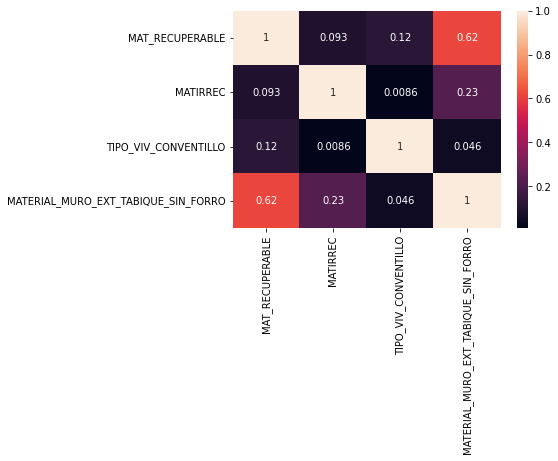

In [ ]:
#Implementación de las librerias a utilizar para el realizado de una matriz de correlación
import seaborn as sn
import matplotlib.pyplot as plt

# Se escogen las columnas a que seran parte del proceso de correlación
corrMatrix_data = Censo_Filtrado.iloc[:,[31,32,8,15]]

# Se realiza el calculo de correlación entre los valores dados para luego ser visualizados a traves del uso de un mapa de calor.
corrMatrix = corrMatrix_data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

De la correlación preliminarmente se obtiene una relación fuerte entre los tipos de materiales y el tipo de materialidad descrita en la manzana, lo cual es esperable leyendo el manual de uso del CENSO.

## Gráfico de BoxPlot sobre índice de materialidad ##

Se utiliza un gráfico de boxplot para revisar la dispersión de los datos, se observa que el promedio es cercano al 0.9 por lo tanto la materialidad se acerca mucho a ser descrita como buena según el índice de materialidad.

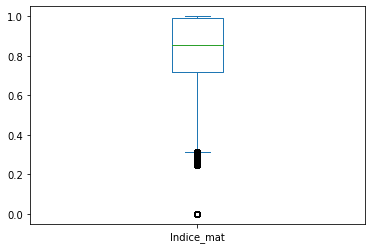

In [ ]:
# Visualización del indice de materialidad a traves de un boxplot realizado con el plot de la libreria de pandas
Censo_Filtrado["Indice_mat"].plot(kind='box')

El índice de materialidad descrito concuerda con los datos, ya que nos muestra que cerca del 90% de las manzanas cuentan con materialidad aceptable.

### Distribución de viviendas
Un atributo que podría ayudar a predecir la categoría de una manzana es su porcentaje de viviendas que son colectivas y las que no son. Sin embargo se puede observar que el número de viviendas colectivas registradas son muy pequeñas en comparación, por lo que habría muy pocos datos para que un clasificador usara este atributo como diferenciador.

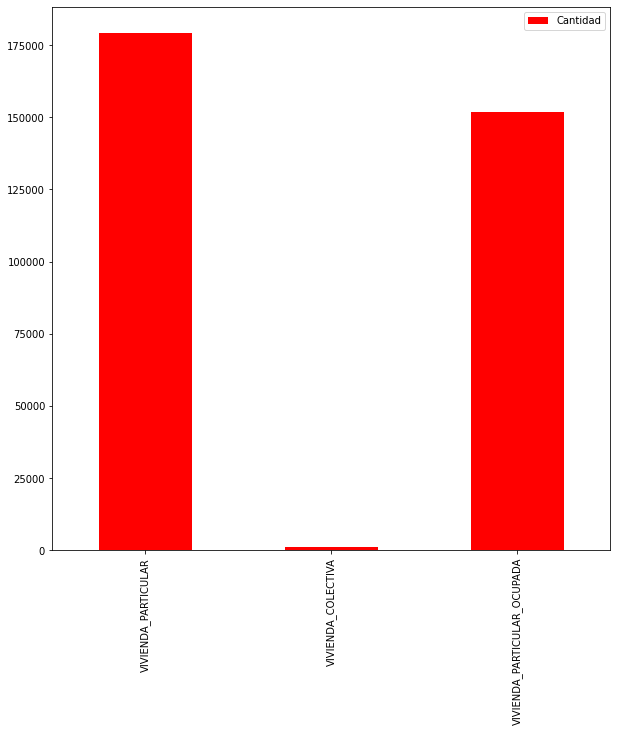

In [ ]:
import matplotlib.pyplot as plt

# Se realiza una suma de todos los valores de la columnas con el proposito de observar las diferencias de los totales de cada columnas
Censo_Filtrado_totales_plot = pd.DataFrame(Censo_Filtrado.sum(), columns=['Cantidad'])
Censo_Filtrado_totales_plot['Tipo'] = Censo_Filtrado.columns.tolist()

# Se realiza la visualización de los tipo de viviendas totales contabilizados dentro del Censo con el uso del Plot p
plt_censo_total_viv = Censo_Filtrado_totales_plot.iloc[1:4,:].plot(kind = "bar", color = 'red', figsize = (10,10))
plt.show()

### Tipos de vivienda
Se estima que el tipo de vivienda podría ayudar a predecir la categoría de la manzana, esto tiene sentido si se observa que en un campo o un pueblo pequeño es improbable que hayan departamentos, es decir hay tipos de vivienda que son más comunes en algunas categorías que en otras.

Del gráfico de barras se observa que la mayoría de las viviendas en Chile son casas.Se cree que podrían existir casas en muchas categorías distintas sin embargo la distribución de las demás categorías es más pareja y podrían usarse para predecir la categoría de la manzana, por lo tanto se considerarán en la fase experimental.

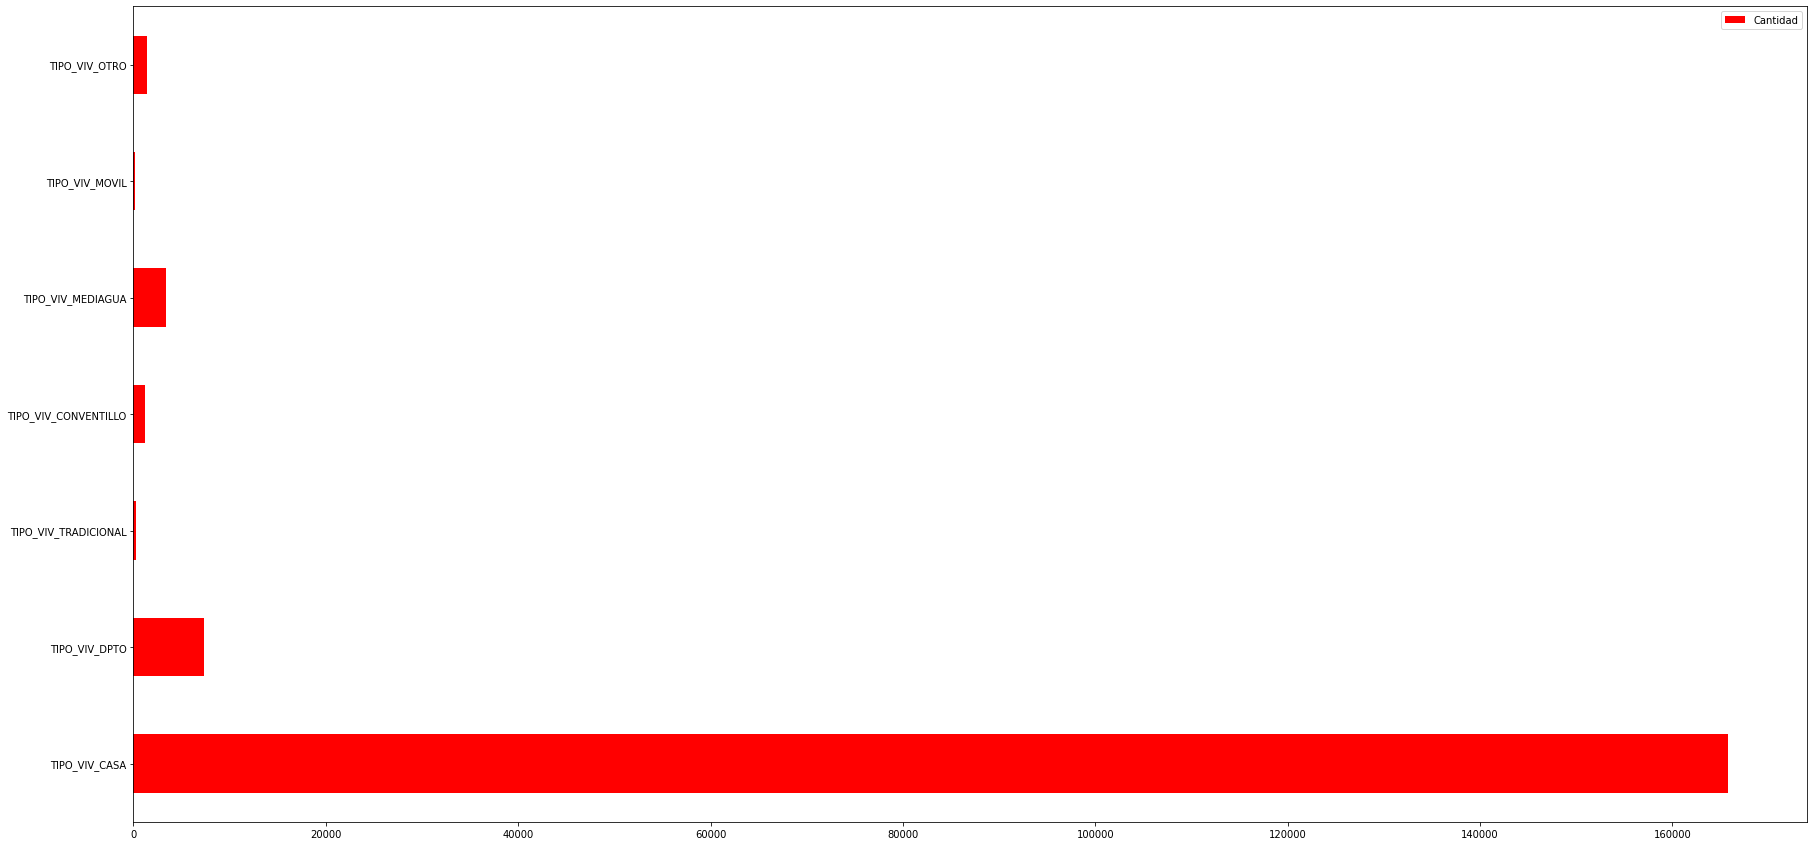

In [ ]:
# Se realiza una suma de todos los valores de las columnas con el propósito de observar las diferencias de los totales de cada columna
Censo_Filtrado_totales_plot = pd.DataFrame(Censo_Filtrado.sum(), columns=['Cantidad'])
Censo_Filtrado_totales_plot['Tipo'] = Censo_Filtrado.columns.tolist()

# Se realiza la visualización de los tipos de viviendas totales contabilizados dentro del Censo con el uso del Plot propio de Pandas
plt_censo_total_tipo_viv = Censo_Filtrado_totales_plot.iloc[5:12,:].plot.barh(y = "Cantidad", color='red', figsize=((30,15)))
plt.show()

Se observa que las viviendas de tipo casa se imponen sobre las otras con gran mayoría (alrededor del 80% de los datos).

### Recuperabilidad de los materiales
Gracias a las definiciones del manual del CENSO sabemos que existe una posible relación entre la recuperabilidad de los materiales y la categoría de la manzana, sabemos que por definición si una manzana contiene materiales de tierra es más probable que su condición de materialidad sea irrecuperable, se estima que tener pisos de tierra podría implicar que la manzana pertenece a ciertas categorías y no a otras por ejemplo es más probable que en una ciudad haya más pavimentación que en un campo y por lo tanto menos porcentaje de pisos de tierra.

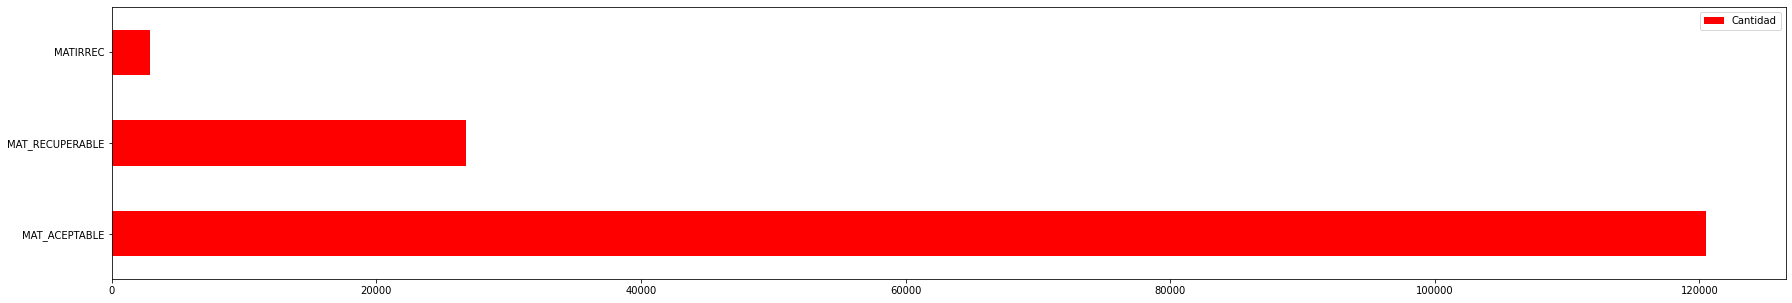

In [ ]:
# Se realiza una suma de todos los valores de las columnas con el propósito de observar las diferencias de los totales de cada columna
Censo_Filtrado_totales_plot = pd.DataFrame(Censo_Filtrado.sum(), columns=['Cantidad'])
Censo_Filtrado_totales_plot['Tipo'] = Censo_Filtrado.columns.tolist()

# Se realiza la visualización de la clasificación con respecto a la aceptabilidad de los materiales de construcción usados en los hogares que recibieron los hogares Censados, 
# esto a través del método Plot propio de Pandas
plt_censo_total_rec_mat = Censo_Filtrado_totales_plot.iloc[30:33,:].plot.barh(y = "Cantidad", color='red', figsize=((30,5)))
plt.show()

Del gráfico de barras se desprende que la mayoría de las manzanas cuentan con una materialidad aceptable.

### Origen del agua
Se cree que los atributos asociados al origen del agua pueden estar fuertemente asociados a la categoría de la manzana por el hecho de que si el origen del agua es vertiente o pozo podría ser un fuerte indicador de que la manzana es un campo o caserío.

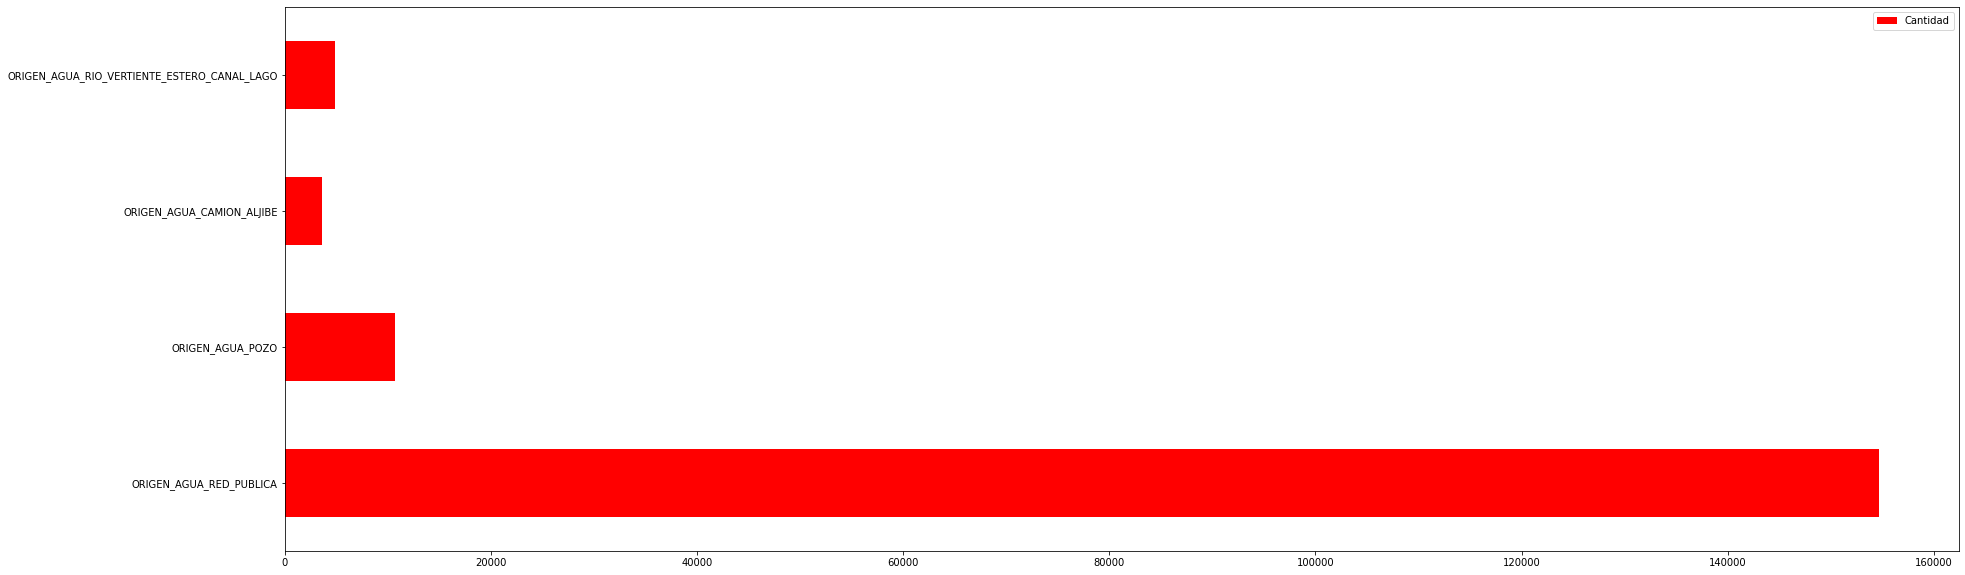

In [ ]:
Censo_Filtrado_totales_plot = pd.DataFrame(Censo_Filtrado.sum(), columns=['Cantidad'])
Censo_Filtrado_totales_plot['Tipo'] = Censo_Filtrado.columns.tolist()

# Se realiza una visualización del Origen de Agua de cada Manzana dentro del Censo  
plt_censo_total_fuente_agua = Censo_Filtrado_totales_plot.iloc[33:37,:].plot.barh(y = "Cantidad", color='red', figsize=((30,10)))
plt.show()

Posteriormente se utiliza un gráfico tipo torta para representar de mejor manera el origen del agua en las distintas manzanas.

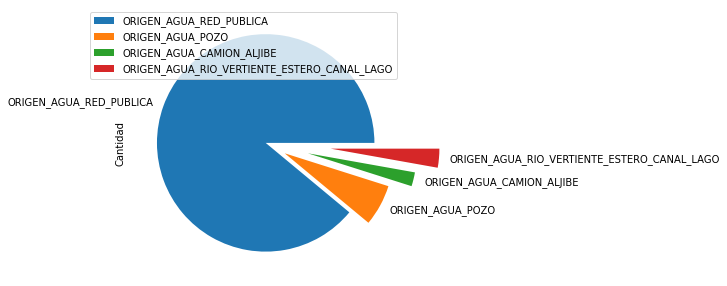

In [ ]:
#Se suman los datos por columna
Censo_Filtrado_totales_plot = pd.DataFrame(Censo_Filtrado.sum(), columns=['Cantidad'])
Censo_Filtrado_totales_plot['Tipo'] = Censo_Filtrado.columns.tolist()
myexplode = [0, 0.2, 0.4, 0.6]

# Se visualiza los porcentajes de consumo de agua, tomando en consideración si el origen de esta 
plt_censo_total_fuente_agua = Censo_Filtrado_totales_plot.iloc[33:37,:].plot.pie(y="Cantidad", figsize=((5,5)), autopct='%1.1f%%', startangle=0, explode = myexplode)
plt.show()

Del gráfico se obtiene una mejor visión de la distribución del origen del agua, de aquí se desprende que según los datos, la mayoría del agua provista a las manzanas viene de la red pública, aunque no indica si la calidad es rural o urbana.

# Preguntas y Problemas

Una de las principales preguntas a resolver es la posibilidad de predecir la clase categoría de la manzana, lo cual permitiría mejorar la calidad de los datos existentes dentro del dataset.

Otro problema que se quiere abordar es tratar de crear un índice que refleje la calidad de los materiales, esto lo hicimos en la etapa experimental y le llamamos INDICE_MAT.

Por último se cree que con estos atributos elegidos es posible predecir otras clases en las que se clasifican las manzanas, por ejemplo si es rural o urbano, esto podría acelerar el proceso de censado del país.


#Propuesta Experimental


En esta sección se implementará la primera pregunta planteada que busca predecir la categoría de la manzana. Para ello lo que se hará es entrenar el subconjunto de datos que posea una categoría definida, para luego predecir la categoría de las filas las cuales poseen valor indeterminado de aquel atributo.

In [ ]:
#Se crea un subset modificando el original, eliminado la clase.
Censo_Filtrado_variables_significativas = Censo_Filtrado.iloc[:,0:-2]

Se crea un subconjunto de manzanas que poseen categoría definida, luego se dividen en dos secciones, las que corresponden a la de datos (X) y la de clase (y). Es importante tener en cuenta que la proporción de manzanas con categoría indeterminada es mucho mayor a las que poseen categoría definida, lo que producirá un cierto sesgo en sus resultados.

In [ ]:
# Se realiza el filtro de todos las filas que poseen valores indeterminados
Censo_Filtrado_sin_indeterminadas = Censo_Filtrado_variables_significativas.loc[Censo_Filtrado['NOM_CAT_ENT'] != "Indeterminada"]
X = Censo_Filtrado_sin_indeterminadas.loc[:, Censo_Filtrado_sin_indeterminadas.columns != 'NOM_CAT_ENT'].values
y = Censo_Filtrado_sin_indeterminadas['NOM_CAT_ENT'].values

Luego se divide tal subconjunto en datos de entrenamiento y datos de prueba, de forma aleatoria y estratificada, utilizando una proporción de 70/30 respectivamente.

In [ ]:
#Se cargan las bibliotecas necesarias para crear un set de entrenamiento y testeo y posterior creación del modelo.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Creación de un set de entrenamiento y testeo con una proporción de 30% entrenamiento y 70% testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,
                                                    random_state=40, stratify=y)

En esta sección se entrenan los datos utilizando el algoritmo de clasificación correspondiente al Decision Tree, para luego validar su grado de precisión. A partir del reporte de clasificación, se observa que las clases "Aldea", "Parcela de Agrado" y "Parcela-Hijuela" poseen un grado de precisión sobre el 50%.

In [ ]:
clf_orig = DecisionTreeClassifier()
clf_orig.fit(X_train, y_train)  ## Se entrena con features X_train y clases y_train
y_pred = clf_orig.predict(X_test)  ## Se predicen con nuevos datos a partir de X_test
print("Accuracy en test set:", accuracy_score(y_test, y_pred))   ## Se evalúa la predicción comparando y_test con y_pred
print(classification_report(y_test, y_pred))  #Se muestra el reporte de clasificación

Accuracy en test set: 0.4913158260386272
                         precision    recall  f1-score   support

                  Aldea       0.62      0.60      0.61       218
    Asentamiento Minero       0.33      0.31      0.32        75
  Asentamiento Pesquero       0.36      0.43      0.39        75
             Campamento       0.00      0.00      0.00        16
                Caserío       0.39      0.39      0.39      1101
     Comunidad Indígena       0.37      0.38      0.37       647
Fundo-Estancia-Hacienda       0.40      0.54      0.46      1029
                  Otros       0.12      0.03      0.05        91
      Parcela de Agrado       0.51      0.55      0.53       490
        Parcela-Hijuela       0.60      0.54      0.57      3307
 Veranada-Majada-Aguada       0.39      0.30      0.34       148

               accuracy                           0.49      7197
              macro avg       0.37      0.37      0.37      7197
           weighted avg       0.50      0.49   

## Resultados preliminares ##

Se utilizará el modelo definido anteriormente para predecir la categoría de los datos indeterminados obteniendo así una primera pincelada de la eficacia del modelo.

In [ ]:
clase = "NOM_CAT_ENT"

# Con el modelo entrenado se utilizan las filas con valores Indeterminados para realizar la predicción con el modelo entrenado
Censo_Filtrado_con_indeterminadas = Censo_Filtrado_variables_significativas.loc[Censo_Filtrado[clase] == "Indeterminada"]
X_indeterm = Censo_Filtrado_con_indeterminadas.loc[:, Censo_Filtrado_con_indeterminadas.columns != clase]
y_pred_indeterm = clf_orig.predict(X_indeterm.values)
X_indeterm["NOM_CAT_ENT"] = y_pred_indeterm

## Histograma de categoría ##

Se utiliza una visualización de tipo histograma para comprobar la distribución de los datos predecidos por el modelo, de esta forma nos aseguramos que se asemeja al rendimiento esperado.

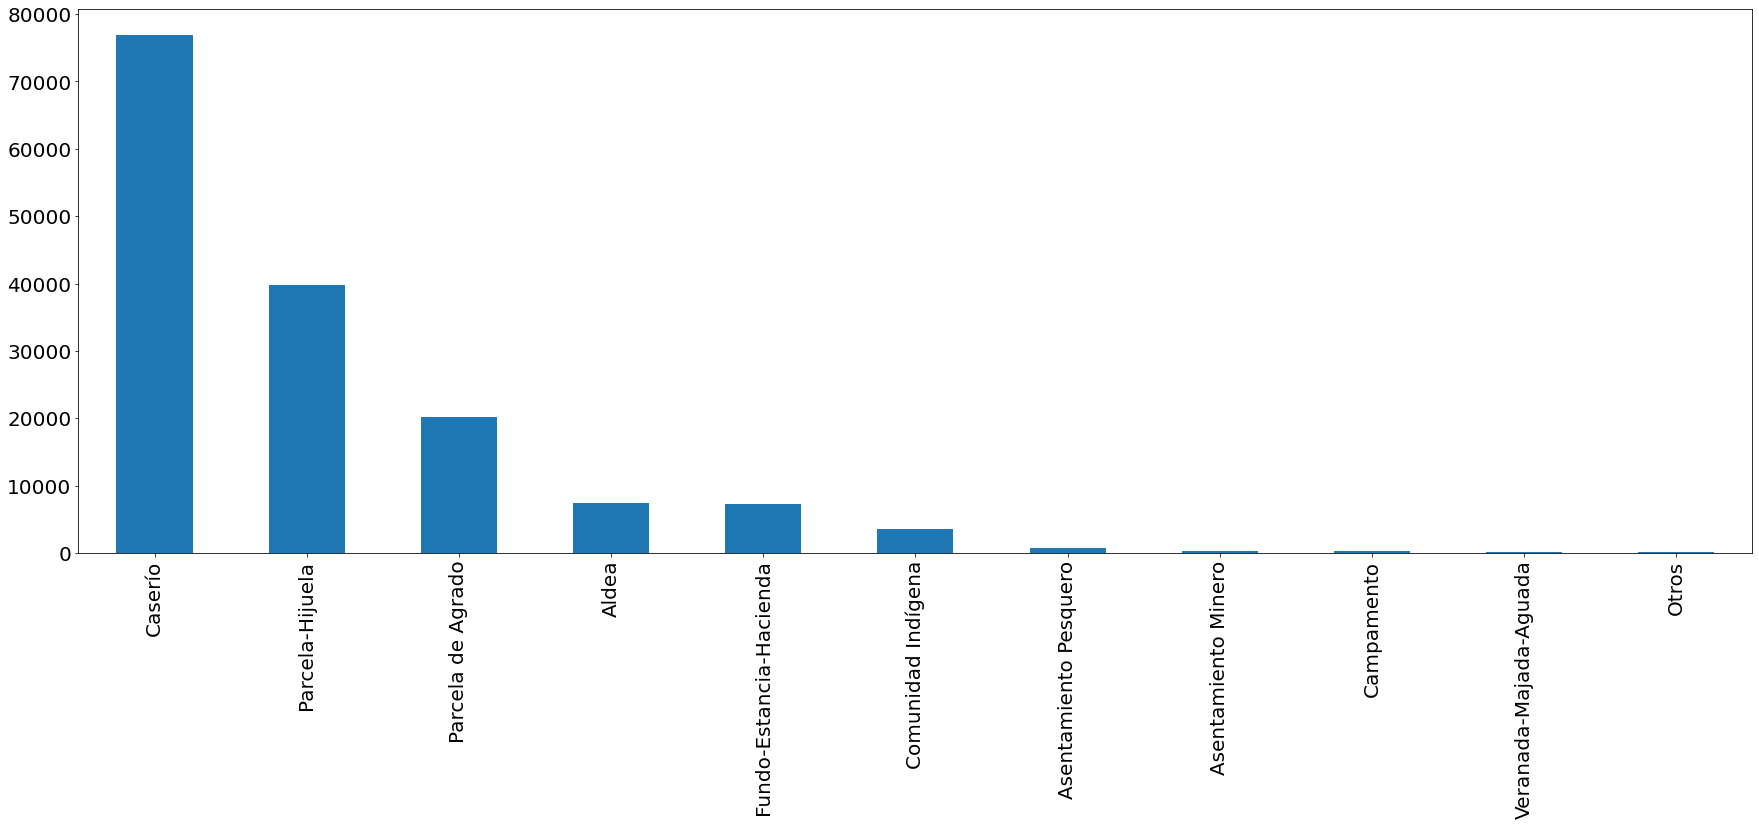

In [ ]:
# Visualización de la predicción realizada
X_indeterm["NOM_CAT_ENT"].value_counts().plot(kind='bar', figsize=(30,10), fontsize=20)

## Conclusión ##
En base al experimento realizado se observa que la capacidad de predicción del modelo en base a los atributos elegidos alcanza alrededor del 60%, lo cual indica que el modelo es favorable y cumple con acertar más del 50% de las predicciones. Al revisar la predicción de datos no controlados, se observa una tendencia a clasificar sectores rurales, lo cual tiene relevancia ya que es lógicamente probable que esas zonas de difícil acceso no hayan sido catalogadas, no así la ciudad la cual tiene menos incidencia según el modelo. Se considera que este experimento cumple las expectativas de un modelo que vale la pena seguir optimizando para posteriormente ser utilizado en el estudio del CENSO.

## Referencias ##


https://redatam-ine.ine.cl/manuales/Manual-Usuario.pdf

https://pandas.pydata.org/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html

https://towardsdatascience.com/reshaping-a-pandas-dataframe-long-to-wide-and-vice-versa-517c7f0995ad#:~:text=To%20summarize%2C%20if%20you%20need,melt()%20.

https://sparkbyexamples.com/pandas/pandas-set-index-to-column-in-dataframe/

https://www.w3schools.com/python/matplotlib_pie_charts.asp

https://www.w3schools.com/python/pandas/pandas_plotting.asp

https://www.geeksforgeeks.org/change-figure-size-in-pandas-python/

https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/

https://stackoverflow.com/questions/55240330/how-to-read-csv-file-from-github-using-pandas

https://stackoverflow.com/questions/16459217/in-pandas-how-can-i-get-a-dataframe-as-the-output-while-i-sum-the-dataframe

https://stackoverflow.com/questions/41286569/get-total-of-pandas-column

https://stackoverflow.com/questions/61690632/why-pandas-dataframe-sumaxis-0-returns-sum-of-values-in-each-column-where-axis

https://stackoverflow.com/questions/25748683/pandas-sum-dataframe-rows-for-given-columns

https://stackoverflow.com/questions/56010449/selecting-columns-axes-for-correlation-from-pandas-df

https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy

https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe

https://stackoverflow.com/questions/26414913/normalize-columns-of-a-dataframe

https://stackoverflow.com/questions/25050141/how-to-filter-in-nan-pandas

https://stackoverflow.com/questions/14942681/change-size-of-axes-title-and-labels-in-ggplot2

## Declaración de autoria ##

Arturo Avendaño - Realización de PDF, conclusión, referencias, histograma de categoría, corrección de errores, introducción y preguntas de investigación, corrección de ortografía.

Alonso Rojas - Analisis exploratorio correctivo, normalizacion de datos, histogramas distribucion fuente de agua, tipo de vivienda, ocupacion de vivienda, redaccion analisis graficos, redaccion analisis exploratorio.

Kianush Atighi-Moghaddam - Índice de materialidad por manzana, propuesta experimental, resultados preliminares, gráfico de boxplot sobre índice de materialidad